|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section10.2, chauffage d'un conducteur électrique

>  Le développement fait dans Transport Phenomena sera répété ici en développant les solutions avec le calculateur formel sympy et en traçant la solution avec sympy.plot. Les développements sont très similaires à la section 2.3, Les coordonnées cylindriques sont utilisées, évidemment. Remarquez bien comment la courbure de la géométrie a un effet sur le bilan. <img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-2.png'>

In [1]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp          
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions
#
r,delta_r,L,k,S_c,R=sp.symbols('r,delta_r,L,k,S_c,R')
C1=sp.symbols('C1')
qr=sp.symbols('q_r')
T=sp.Function('T')(r)

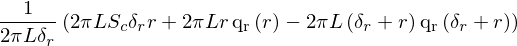

In [3]:
#
# Équation du bilan d'énergie
#
eq=2*sp.pi*r*L*qr(r)-2*sp.pi*(r+delta_r)*L*qr(r+delta_r)    # conduction
eq=eq+2*sp.pi*r*delta_r*L*S_c                                #source
#
# pose de la limite quand dr tends vers 0
#
eq=eq/(2*sp.pi*L*delta_r)
display(eq)

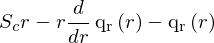

In [4]:
eq1=sp.limit(eq,delta_r,0).doit()
display(eq1)

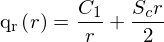

In [5]:
eq2=sp.dsolve(eq1)
display(eq2)

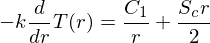

In [6]:
# Loi de Fourier.
Fourier=-k*sp.Derivative(T,r)
eq2=eq2.subs(qr(r),Fourier)
display(eq2)

'Le profil de température général, avant de poser les conditions aux limites'

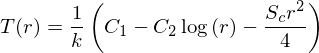

In [7]:
eq2=sp.dsolve(eq2)
display('Le profil de température général, avant de poser les conditions aux limites',eq2)
eq2=eq2.rhs # 

'Les conditions aux limites, en r=0 flux nul et en r=R T=T_0'

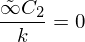

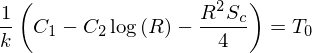

'Les constantes'

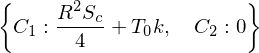

In [8]:
T_0=sp.symbols('T_0')
condition_1=sp.Eq(eq2.diff(r).subs(r,0),0)     # flux nul en r=0
condition_2=sp.Eq(eq2.subs(r,R),T_0)           # température connue en r=R
display('Les conditions aux limites, en r=0 flux nul et en r=R T=T_0',condition_1,condition_2)
constante=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'),dict=True) 

display('Les constantes',constante[0])  # les constantes apparaissent dans une liste de 1 élément, dans un dictionnaire
constante=constante[0] # 

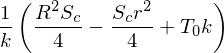

In [9]:
T=eq2.subs(constante)
display(T)

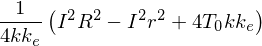

In [10]:
I,k_e=sp.symbols('I k_e')
source=I**2/k_e
T=T.subs(S_c,source)
display(T.simplify())

> #### Exemple 10.2-2
>> La différence est maintenant que la condition à la paroi est la loi de refroidissement de Newton au lieu de température fixée à T_0 , c'est l'équation 10.2-22:

>><center>
en r=R, $-k\frac {dT}{dr}=h(T-T_{air})$
</center>

>> On peut reprendre la solution au moment ou on a posé cette contition

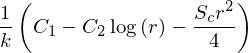

'Les conditions aux limites, en r=R flux de Fourier=flux de Newton et flux = 0 en r=0'

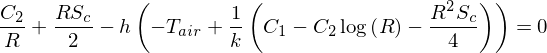

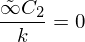

'les constantes avec une condition de coefficient de transfert en r=R'

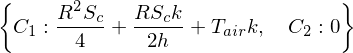

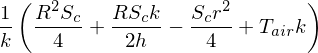

In [11]:
# constante=sp.solve(sp.Eq(eq2.rhs.subs(r,R),T_0),'C1',dict=True)   # T=T_0 à la paroi
#
# remplacé par
#
eqx=eq2
display(eq2)
T_air,h=sp.symbols('T_air h')
condition_1=sp.Eq(-k*eqx.diff(r).subs(r,R)-h*(eqx.subs(r,R)-T_air),0)
condition_2=sp.Eq(eq2.diff(r).subs(r,0),0)
display('Les conditions aux limites, en r=R flux de Fourier=flux de Newton et flux = 0 en r=0',
        condition_1,condition_2)
constanten=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'),dict=True) 
constanten=constanten[0]            # sort de la liste
display('les constantes avec une condition de coefficient de transfert en r=R',constanten)
T=eq2.subs(constanten)
display(T)